# An Analysis of Steam Video Games


## Introduction

Steam is probably the largest PC game digital distribution service. I found two datasets on essentially the entire Steam library, both of which had elements I liked. As such, I'll be combining them. Data is very flawed, but we should still be able to see things of interest.

## My Approach

To avoid overwhelming my poor chromebook with too much data, I'll be ch
I'll also break apart the tags to see if a model to predict scores can be made
### The Datasets

Col |Descrition
-----|----- 
Data1|Data2
Data1|Data2
Data1|Data2
Data1|Data2


### Imported Libraries


In [3]:
# Import the appropriate libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ast import literal_eval

# To save time and steps, I only imported relevant columns from the csv. Notice how I set
# the delimiter to ';' as the data wasn't comma-separated.
game_data_git = pd.read_json("https://github.com/leinstay/steamdb/raw/main/steamdb.json")
game_data_kag = pd.read_csv("steam_games.csv", delimiter=";", dtype= {'Initial Price': float},
                            usecols=['App ID', 'Tags', 'Initial Price'])
print("\nGit Data:\n")
display(game_data_git)
print("\n\nKaggle Data:\n")
display(game_data_kag)


Git Data:



,sid,store_url,store_promo_url,store_uscore,published_store,published_meta,published_stsp,published_hltb,published_igdb,image,...,meta_url,meta_score,meta_uscore,grnk_score,igdb_url,igdb_single,igdb_complete,igdb_score,igdb_uscore,igdb_popularity
0,10,https://store.steampowered.com/app/10,https://www.youtube.com/watch?v=oKC9SAF4JAc,97.0,2000-11-01,2000-11-08,2000-11-01,1999-06-12,1999-06-12,https://steamcdn-a.akamaihd.net/steam/apps/10/...,...,https://www.metacritic.com/game/pc/counter-str...,88.0,92.0,NaN,https://www.igdb.com/games/counter-strike,NaN,NaN,70.0,83.0,25.74
1,20,https://store.steampowered.com/app/20,None,84.0,1999-04-01,1999-04-07,1999-04-01,1999-04-07,1999-04-07,https://steamcdn-a.akamaihd.net/steam/apps/20/...,...,https://www.metacritic.com/game/pc/team-fortre...,NaN,71.0,NaN,https://www.igdb.com/games/team-fortress-classic,NaN,NaN,NaN,70.0,1.67
2,30,https://store.steampowered.com/app/30,https://www.youtube.com/watch?v=j4MCo89bTWE,90.0,2003-05-01,2003-05-06,2003-05-01,2000-08-04,2003-05-01,https://steamcdn-a.akamaihd.net/steam/apps/30/...,...,https://www.metacritic.com/game/pc/day-of-defe...,79.0,91.0,NaN,https://www.igdb.com/games/day-of-defeat,NaN,NaN,71.0,76.0,1.45
3,40,https://store.steampowered.com/app/40,https://www.youtube.com/watch?v=jN_18uhiMS8,82.0,2001-06-01,2001-06-07,2001-06-01,2001-06-01,2001-07-01,https://steamcdn-a.akamaihd.net/steam/apps/40/...,...,https://www.metacritic.com/game/pc/deathmatch-...,NaN,68.0,NaN,https://www.igdb.com/games/deathmatch-classic,NaN,NaN,NaN,75.0,1.00
4,50,https://store.steampowered.com/app/50,https://www.youtube.com/watch?v=ZNZsWm-Ulk4,95.0,1999-11-01,1999-10-31,1999-11-01,1999-11-01,1999-11-10,https://steamcdn-a.akamaihd.net/steam/apps/50/...,...,https://www.metacritic.com/game/pc/half-life-o...,NaN,86.0,NaN,https://www.igdb.com/games/half-life-opposing-...,6.0,4.0,70.0,82.0,3.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53976,1966310,https://store.steampowered.com/app/1966310,None,NaN,2022-04-22,None,None,None,None,https://cdn.akamai.steamstatic.com/steam/apps/...,...,None,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN
53977,1971880,https://store.steampowered.com/app/1971880,None,NaN,2022-04-22,None,None,2016-12-09,None,https://cdn.akamai.steamstatic.com/steam/apps/...,...,None,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN
53978,1971980,https://store.steampowered.com/app/1971980,None,NaN,2022-04-21,None,None,None,None,https://cdn.akamai.steamstatic.com/steam/apps/...,...,None,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN
53979,1976030,https://store.steampowered.com/app/1976030,None,NaN,2022-04-24,None,None,None,None,https://cdn.akamai.steamstatic.com/steam/apps/...,...,None,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN




Kaggle Data:



,App ID,Tags,Initial Price
0,10,"Action: 5426, FPS: 4831, Multiplayer: 3392, Sh...",999.0
1,1000000,"""Shoot Em Up"": 186, Metroidvania: 181, Bullet ...",999.0
2,1000010,"Rogue-like: 268, Turn-Based Combat: 254, RPG: ...",1999.0
3,1000030,"Typing: 221, Management: 213, Casual: 209, Dif...",1999.0
4,1000040,"Action: 22, Casual: 22, Indie: 21, Simulation: 20",199.0
...,...,...,...
55686,999880,"Education: 22, VR: 6, Space: 5",0.0
55687,999890,"Casual: 21, Indie: 21, Adventure: 20",299.0
55688,999900,"Animation & Modeling: 25, 3D: 13",0.0
55689,999930,"Early Access: 21, Indie: 20, RPG: 20, Strategy...",499.0


## Prepping / Cleaning the Data

### Dropping Columns

One hot encoding for the difficulty. Consolidate length by removing
gfq and igdb length (and also popularity as they're apperently no longer supported in the API). Remove steam
spy stuff as it has issues with accuracy.
### Dropping Rows


### Format Cleanup
The price values are missing decimal points. 
Set published_store to date time

In [4]:
# Check for missing values
print("\n\n\nMissing Values Count Kaggle Data:\n ")
print(game_data_kag.isnull().sum())

print("\n\n\nMissing Values Count Github Data:\n ")
print(game_data_git.isnull().sum())

# Dropping the unused columns in the git table
game_data_git.drop(inplace=True, columns=['store_url', 'store_promo_url', 'published_meta', 'published_stsp',
                                          'published_hltb', 'published_igdb', 'image', 'description',
                                          'voiceovers', 'gfq_url', 'gfq_rating_comment', 'gfq_length_comment',
                                          'hltb_url', 'meta_url', 'igdb_url', 'achievements', 'discount',
                                          'igdb_popularity', 'igdb_single', 'igdb_complete', 'gfq_length',
                                          'stsp_owners', 'stsp_mdntime', 'gfq_difficulty_comment', 'tags',
                                          'full_price', 'current_price', 'grnk_score', 'genres'])




Missing Values Count Kaggle Data:
 
App ID             0
Tags             135
Initial Price      0
dtype: int64



Missing Values Count Github Data:
 
sid                           0
store_url                     0
store_promo_url           46435
store_uscore              20519
published_store             150
published_meta            20378
published_stsp            34365
published_hltb            28150
published_igdb            33016
image                         0
name                          0
description                  49
full_price                 7164
current_price              7164
discount                  47452
platforms                     0
developers                   94
publishers                    0
languages                    17
voiceovers                29801
categories                   70
genres                        0
tags                      33608
achievements              25265
gfq_url                   21375
gfq_difficulty            41626
gfq_difficulty

In [5]:
# Joining the two data tables. We'll do an inner merge, using the store ID, since if they're not in both
# they're probably too obscure to be of value anyways.
game_data = pd.merge(left=game_data_git, right=game_data_kag, how='inner', left_on='sid', right_on='App ID')

# Drop the App ID column as it's no longer needed
game_data.drop('App ID', inplace=True, axis=1)

# Encode the difficulties in a scale. There's encoders, but a simple find and replace works well here.
print(game_data['gfq_difficulty'].unique()) # See the values to encode

replace_dict = {'Just Right-Tough':2.5, 'Just Right':2, 'Easy-Just Right':1.5, 'Tough':3,
              'Tough-Unforgiving':3.5, 'Unforgiving':4, 'Easy':1, 'Simple':0, 'Simple-Easy':0.5}


game_data.replace({'gfq_difficulty':replace_dict}, inplace=True)

['Just Right-Tough' 'Just Right' 'Easy-Just Right' 'Tough' None
 'Tough-Unforgiving' 'Unforgiving' 'Easy' 'Simple' 'Simple-Easy']


In [6]:


#tags_df = pd.DataFrame(literal_eval(game_data['Tags']))

#print("\n\n\nFinal Missing Values Count:\n ")
#print(game_data.isnull().sum())

In [7]:
# Fix the initial price by dividing by 100
game_data['Initial Price'] = game_data['Initial Price'] / 100

# Format published data as datetime
game_data['published_store'] = pd.to_datetime(game_data['published_store'])
# Scale gfq_rating to be out of 100 like the others
game_data['gfq_rating'] = game_data['gfq_rating'] * 20

# Get rid of rows that have no review score
game_data.dropna(how='all', subset=['store_uscore', 'meta_score', 'meta_uscore',
                                    'igdb_score', 'gfq_rating', 'igdb_uscore'], inplace=True)

# Add average score columns
game_data['avg_uscore'] = game_data[['store_uscore', 'meta_uscore',
                                     'igdb_uscore', 'gfq_rating']].mean(axis=1)
game_data['avg_critic_score'] = game_data[['meta_score', 'igdb_score']].mean(axis=1)

 ## Data rep visu

                sid  store_uscore  gfq_difficulty    gfq_rating   hltb_single  \
count  3.205600e+04  31999.000000    11740.000000  12801.000000  11307.000000   
mean   6.806296e+05     70.503641        2.066269     66.628170      8.872380   
std    3.060577e+05     19.670728        0.829407     17.031233     51.595316   
min    1.000000e+01      1.000000        0.000000     10.000000      1.000000   
25%    4.351475e+05     57.000000        1.500000     60.000000      1.000000   
50%    6.832350e+05     75.000000        2.000000     70.000000      4.000000   
75%    9.260925e+05     86.000000        2.500000     78.200000      9.000000   
max    1.275630e+06    100.000000        4.000000    100.000000   5149.000000   

       hltb_complete   meta_score  meta_uscore   igdb_score   igdb_uscore  \
count    9868.000000  3574.000000  5809.000000  4337.000000  12032.000000   
mean       24.497973    71.480134    68.742124    70.322804     64.760140   
std       114.968423    11.062782    14

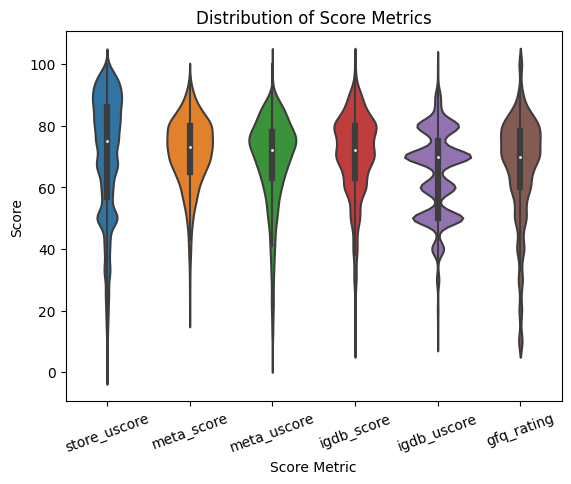

In [8]:
print(game_data.describe())


# Violin plot to show distribution of scores. In matplotlib we'd have to melt the scores first, but not
# with seaborn
scor_dist_plt = sns.violinplot(game_data[['store_uscore', 'meta_score', 'meta_uscore',
                                       'igdb_score', 'igdb_uscore', 'gfq_rating']])
scor_dist_plt.set(xlabel='Score Metric', ylabel='Score', title='Distribution of Score Metrics')

# Rotate the x-axis labels to see them better
scor_dist_plt.tick_params(axis='x',rotation=20)

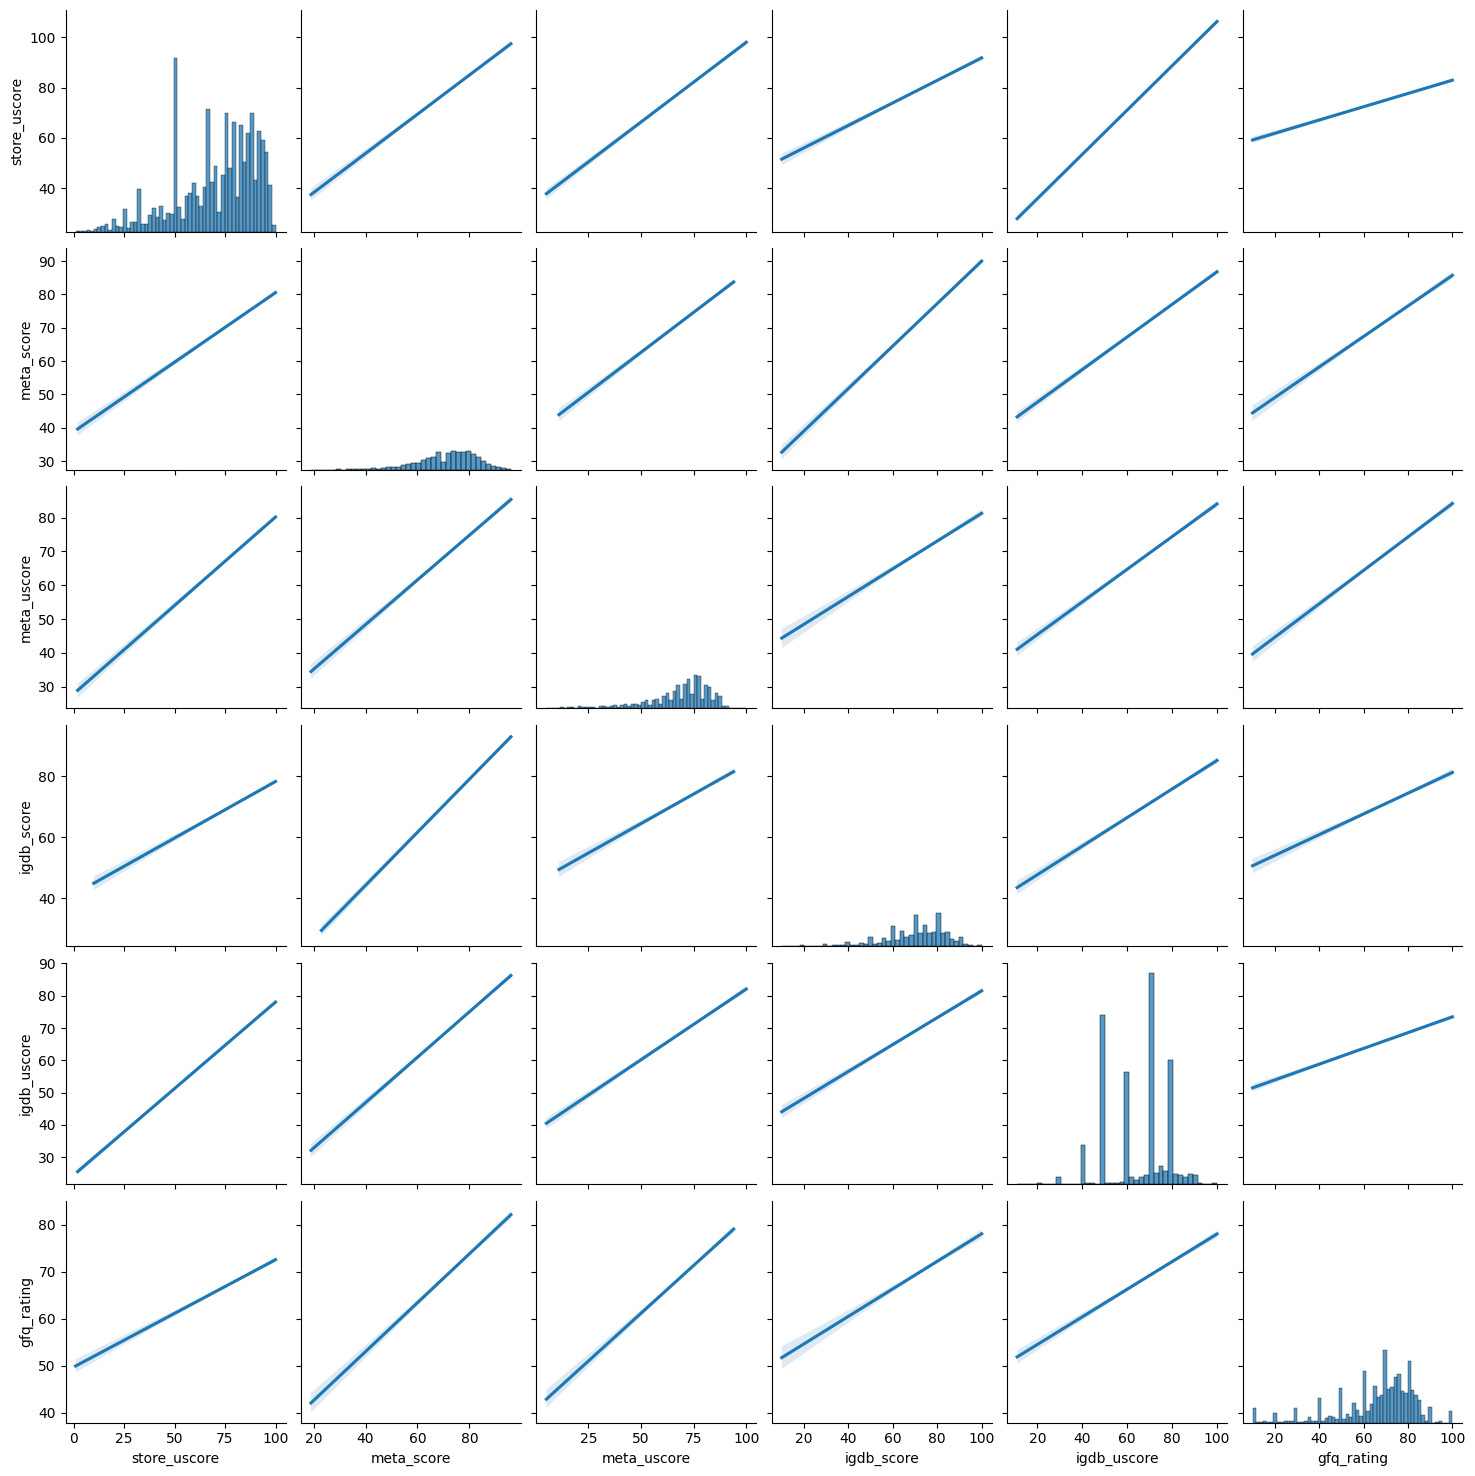

In [9]:
# Plots to see relationship between the various scores. We should expect to see large positive covariances.
score_pair_plot = sns.pairplot(game_data[['store_uscore', 'meta_score', 'meta_uscore',
                                       'igdb_score', 'igdb_uscore', 'gfq_rating']],
                               kind='reg', dropna=True, plot_kws=dict(scatter=False))

Correlation coeff. between difficulty and game length (single): 
0.17667189912027736

Correlation coeff. between difficulty and game length (complete): 
0.21939791220468663


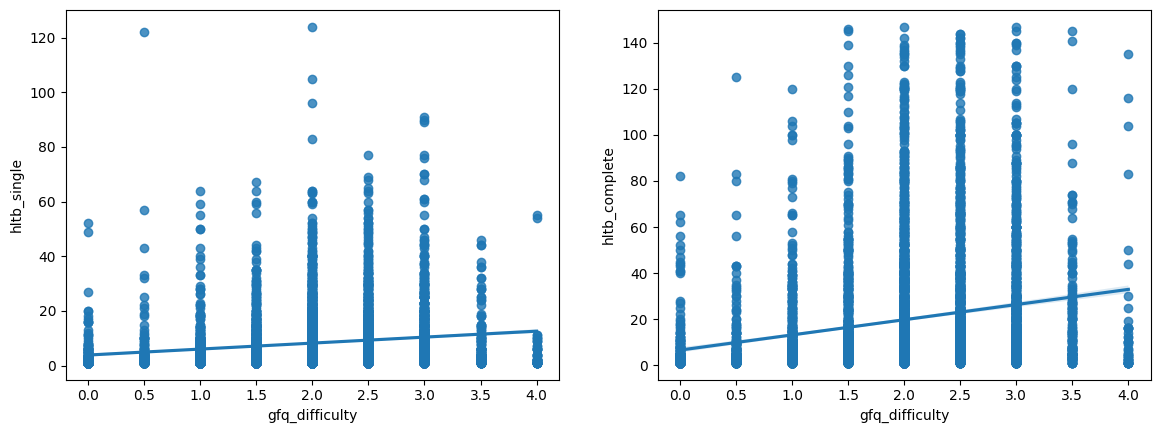

In [37]:
# Surprisingly, it seems that there's not much correlation between length and difficulty.

# Remove outliers (length greater than 150 hours, since if the game takes longer than that, it's just being
# annoying)
len_diff_df = game_data[(game_data['hltb_single'] < 150) & (game_data['hltb_complete'] < 150)]

# Create two regression plots
f, axes = plt.subplots(1, 2)
diff_len_plt1 = sns.regplot(len_diff_df, x='gfq_difficulty', y='hltb_single', ax=axes[0])
diff_len_plt2 = sns.regplot(len_diff_df, x='gfq_difficulty', y='hltb_complete', ax=axes[1])

f.set(figwidth=14)

# Print out the correlation coefficients
print("Correlation coeff. between difficulty and game length (single): ")
print(len_diff_df['gfq_difficulty'].corr(len_diff_df['hltb_single']))
print("\nCorrelation coeff. between difficulty and game length (complete): ")
print(len_diff_df['gfq_difficulty'].corr(len_diff_df['hltb_complete']))

,0
developers,
773,3
2015,1
4188,1
666999,1
#12,1
...,...
麟湾工作室,1
麦克儿,1
黄昏フロンティア,2


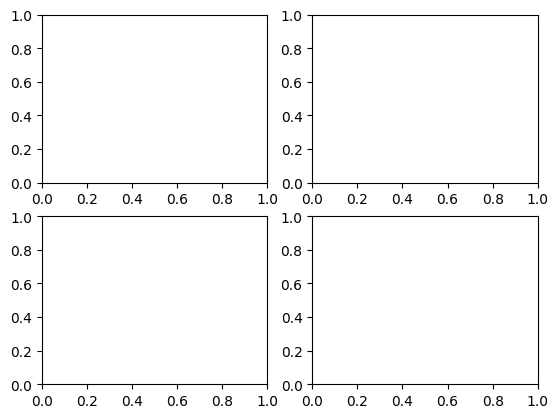

In [63]:
# Let's examine the game scores by publishers and developers

# Get the sum total of games by developer and publisher
total_pubs = pd.DataFrame(game_data.groupby(by='publishers').size())
total_devs = pd.DataFrame(game_data.groupby(by='developers').size())

# Get the totals of games that have high scores by publishers and developers
hi_score_by_pub = game_data[game_data['avg_critic_score'] >= 85].groupby(by='publishers').size()
hi_score_by_dev = game_data[game_data['avg_critic_score'] >= 85].groupby(by='developers').size()


total_pubs = total_pubs.merge(hi_score_by_pub.to_frame(), on='publishers',
                              how='left').rename(columns={'0_x':'Total Games', '0_y':'High Scoring Games'})
total_devs = total_devs.merge(hi_score_by_dev.to_frame(), on='developers',
                              how='left').rename(columns={'0_x':'Total Games', '0_y':'High Scoring Games'})
f, axes = plt.subplots(2, 2)
